In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
data = sns.load_dataset('titanic')

In [37]:
print("\nBasic information about the dataset:")
data.info()



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [38]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [39]:
numerical_features.remove('survived')

In [40]:
print("\nCategorical Features: ", categorical_features)
print("Numerical Features: ", numerical_features)


Categorical Features:  ['sex', 'embarked', 'who', 'embark_town', 'alive']
Numerical Features:  ['pclass', 'age', 'sibsp', 'parch', 'fare']


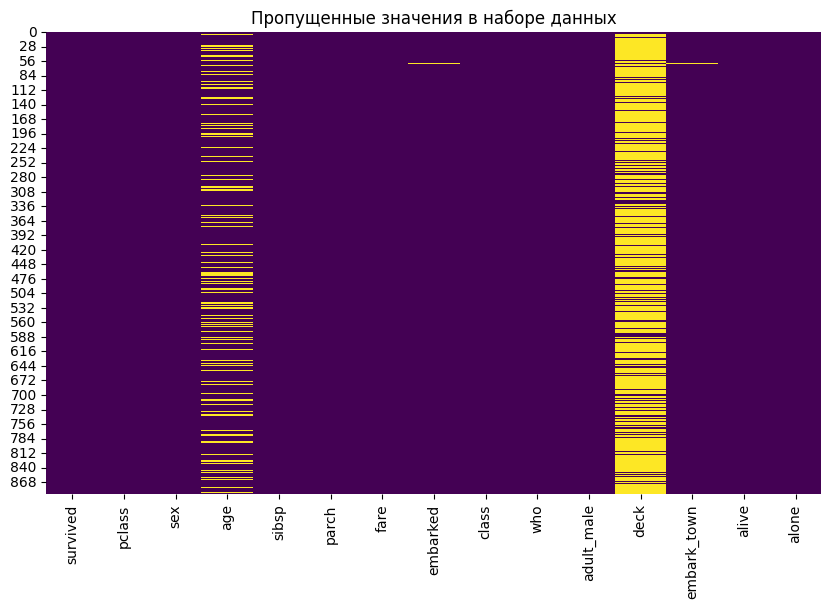

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Пропущенные значения в наборе данных')
plt.show()

In [42]:
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [44]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [46]:
X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

numerical_features_scaled = numerical_features.copy()
categorical_features_encoded = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

all_features = np.hstack([numerical_features_scaled, categorical_features_encoded])
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_features)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_features)

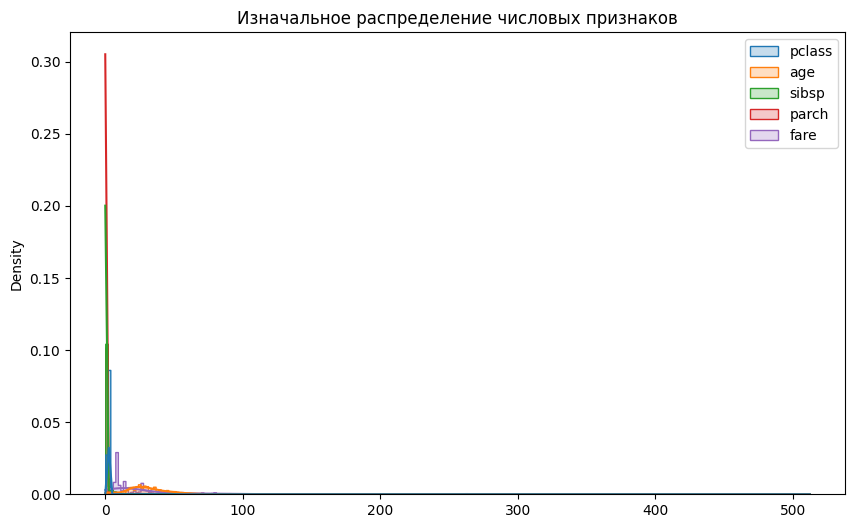

In [47]:
# Part 6: Visualizations
# Original Data Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[numerical_features], kde=True, element='step', stat='density')
plt.title('Изначальное распределение числовых признаков')
plt.show()

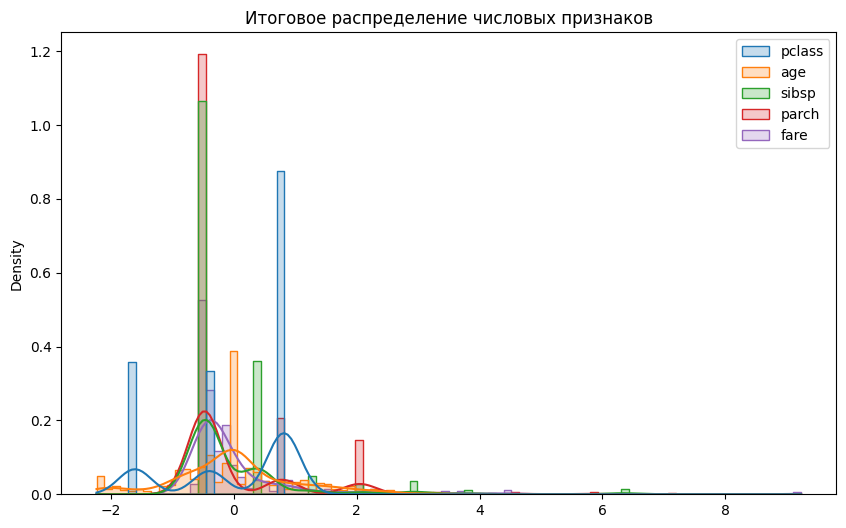

In [50]:
# Processed Data Distribution
plt.figure(figsize=(10, 6))
sns.histplot(X_train_processed_df[numerical_features], kde=True, element='step', stat='density')
plt.title('Итоговое распределение числовых признаков')
plt.show()

In [49]:
# Display the first few rows of the processed training data
print("First few rows of the processed training data:")
display(X_train_processed_df.head())

First few rows of the processed training data:


,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
0,-1.614136,1.232263,-0.470722,-0.479342,-0.078684,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.400551,-0.500482,-0.470722,-0.479342,-0.377145,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.813034,0.192616,-0.470722,-0.479342,-0.474867,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.813034,-0.269449,0.379923,-0.479342,-0.476230,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.813034,-1.809667,2.931860,2.048742,-0.025249,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
